<a href="https://colab.research.google.com/github/aditya-eats-food/project_aryan_neelam_aditya/blob/main/speaker_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
# Path to your audio dataset in Google Drive
audio_dataset_path = "/content/drive/MyDrive/audio_dataset/*.wav"
# Get a list of all audio files and sort them
audio_files = sorted(glob.glob(audio_dataset_path), key=lambda x: os.path.basename(x))
# Check if any audio files were found
if not audio_files:
    print("⚠️ No audio files found in the specified directory.")
else:
    print(f"Found {len(audio_files)} audio files.")
    for file in audio_files:
        print(f"🔊 Audio file: {os.path.basename(file)}")

Found 34 audio files.
🔊 Audio file: Biplo Kuli Assamese Filtered.wav
🔊 Audio file: Biplo Kuli Mising Filtered.wav
🔊 Audio file: Dimpi Assamese.wav
🔊 Audio file: Dimpi Mising.wav
🔊 Audio file: Duna Taid Assamese Filtered.wav
🔊 Audio file: Duna Taid Mising Filtered.wav
🔊 Audio file: Ghana Kanta Payeng Assamese Filtered.wav
🔊 Audio file: Ghana Kanta Payeng Mising Filtered.wav
🔊 Audio file: Ifshita Assamese.wav
🔊 Audio file: Ifshita Mising.wav
🔊 Audio file: Kangkana pegu Assamese.wav
🔊 Audio file: Kangkana pegu Mising.wav
🔊 Audio file: Kushal Payeng Assamese Filtered.wav
🔊 Audio file: Kushal Payeng Mising Filtered.wav
🔊 Audio file: Lakhi Doley Assamese Filtered.wav
🔊 Audio file: Lakhi Doley Mising Filtered.wav
🔊 Audio file: Monalisa Assamese.wav
🔊 Audio file: Monalisa Mising.wav
🔊 Audio file: Mrigank Pegu Assamese Filtered.wav
🔊 Audio file: Mrigank Pegu Mising Filtered.wav
🔊 Audio file: Nikhita Assamese.wav
🔊 Audio file: Nikhita Mising.wav
🔊 Audio file: Pahi Assamese.wav
🔊 Audio file: Pahi

In [ ]:
import librosa
import IPython.display as ipd
import os
# Function to play 15 seconds of an audio file
def play_audio_segment(file_name, duration=15, sr=16000):
    # Construct the full path to the audio file
    file_path = os.path.join("/content/drive/MyDrive/audio_dataset", file_name)
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"⚠️ File not found: {file_name}")
        return
    # Load the audio file
    audio, _ = librosa.load(file_path, sr=sr)
    # Calculate the number of samples for 15 seconds
    samples_15s = duration * sr
    # Play the first 15 seconds
    ipd.display(ipd.Audio(audio[:samples_15s], rate=sr))
# Specify the audio file name directly
audio_file_name = "Duna Taid Assamese Filtered.wav"  # Change this to your desired file name
# Play the audio segment
play_audio_segment(audio_file_name)

In [ ]:
import librosa
import IPython.display as ipd
import os
# Function to play 15 seconds of an audio file
def play_audio_segment(file_name, duration=15, sr=16000):
    # Construct the full path to the audio file
    file_path = os.path.join("/content/drive/MyDrive/audio_dataset", file_name)
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"⚠️ File not found: {file_name}")
        return
    # Load the audio file
    audio, _ = librosa.load(file_path, sr=sr)
    # Calculate the number of samples for 15 seconds
    samples_15s = duration * sr
    # Play the first 15 seconds
    ipd.display(ipd.Audio(audio[:samples_15s], rate=sr))
# Specify the audio file name directly
audio_file_name = "Duna Taid Mising Filtered.wav"  # Change this to your desired file name
# Play the audio segment
play_audio_segment(audio_file_name)

In [ ]:
import os
def assign_language_label(file_path):
    file_name = os.path.basename(file_path)
    if 'Assamese' in file_name:
        return 0
    elif 'Mising' in file_name:
        return 1
    else:
        # You can choose to either skip or return a default label if file doesn't match.
        return None

In [ ]:
# Test labeling on your audio_files list
labels = []
valid_audio_files = []
for file in audio_files:
    label = assign_language_label(file)
    if label is not None:
        valid_audio_files.append(file)
        labels.append(label)

print(f"Found {len(valid_audio_files)} valid audio files with labels.")

Found 34 valid audio files with labels.


In [ ]:
import librosa,numpy as np
def extract_mfcc_features(file_path,sr=16000,n_mfcc=13):
    try:
        audio,_=librosa.load(file_path,sr=sr)
        mfcc=librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=n_mfcc)
        return np.mean(mfcc,axis=1)
    except Exception as e:
        print("Error processing",file_path,":",e)
        return None
features=[];processed_labels=[]
for f,l in zip(valid_audio_files,labels):
    feat=extract_mfcc_features(f)
    if feat is not None:
        features.append(feat);processed_labels.append(l)
features=np.array(features);processed_labels=np.array(processed_labels)
print("Feature matrix shape:",features.shape)

Feature matrix shape: (34, 13)


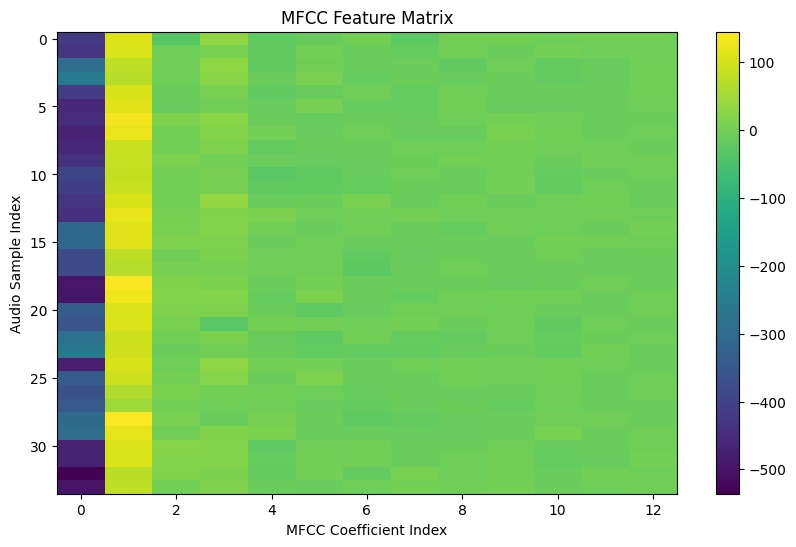

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.imshow(features, aspect='auto', interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.title("MFCC Feature Matrix")
plt.xlabel("MFCC Coefficient Index")
plt.ylabel("Audio Sample Index")
plt.show()

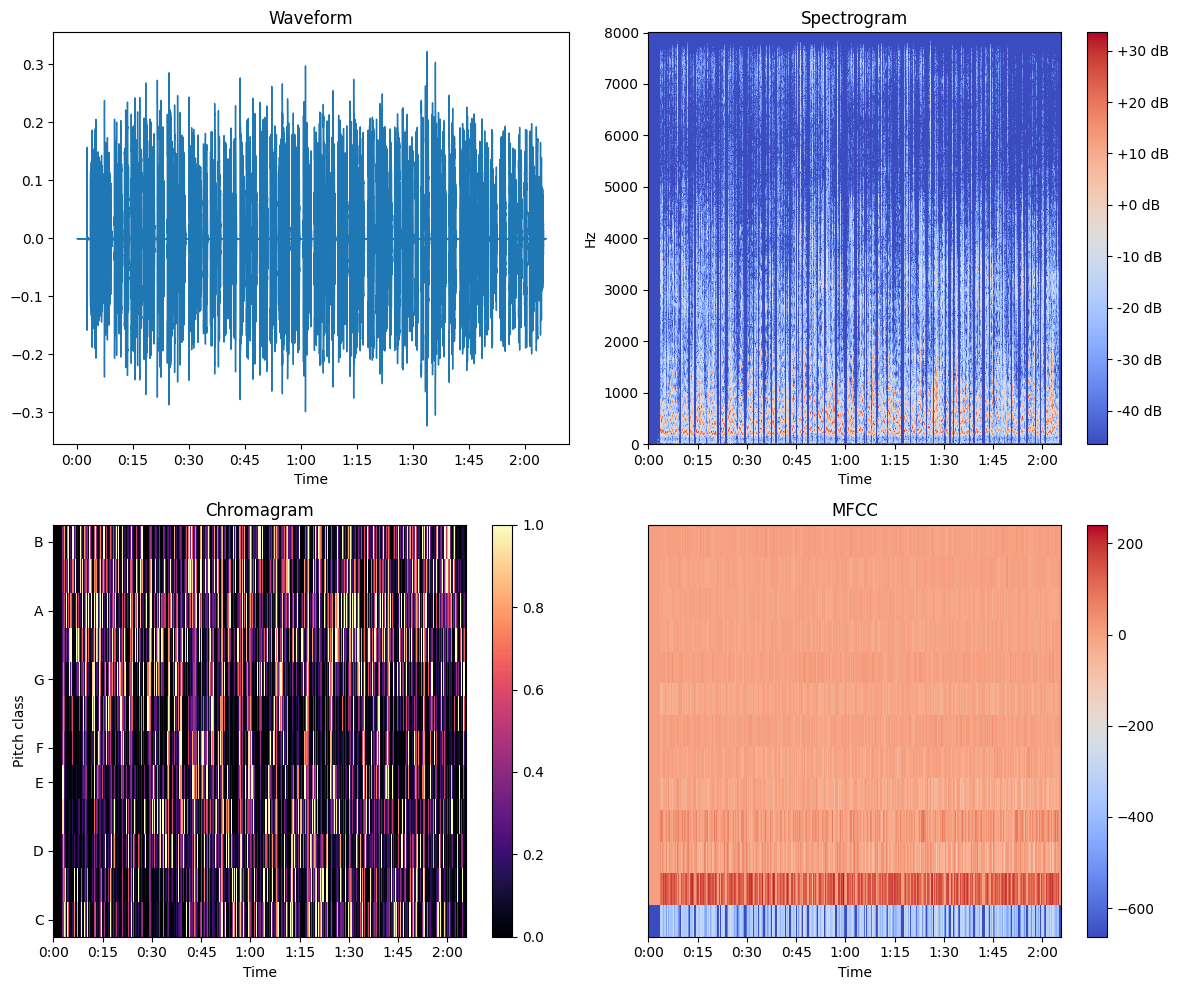

In [ ]:
import matplotlib.pyplot as plt
import librosa, librosa.display

def plot_audio_features(file_path, sr=16000):
    audio, _ = librosa.load(file_path, sr=sr)
    plt.figure(figsize=(12,10))
    # Waveform
    plt.subplot(2,2,1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title("Waveform")
    # Spectrogram
    plt.subplot(2,2,2)
    S = librosa.stft(audio)
    S_db = librosa.amplitude_to_db(abs(S))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
    plt.title("Spectrogram")
    plt.colorbar(format='%+2.0f dB')
    # Chromagram
    plt.subplot(2,2,3)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
    plt.title("Chromagram")
    plt.colorbar()
    # MFCC (time-evolving matrix)
    plt.subplot(2,2,4)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfcc, x_axis='time', sr=sr)
    plt.title("MFCC")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# Example: Plot features of the first valid audio file.
plot_audio_features(valid_audio_files[4])

**RANDOM FOREST CLASSIFIER **

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(features, processed_labels, test_size=0.2, random_state=42, stratify=processed_labels)
clf = RandomForestClassifier(n_estimators=100, random_state=42); clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 28.57%
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.25      0.33      0.29         3

    accuracy                           0.29         7
   macro avg       0.29      0.29      0.29         7
weighted avg       0.30      0.29      0.29         7

Confusion Matrix:
 [[1 3]
 [2 1]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 3, 4]}

# Set up GridSearchCV with 3-fold CV
gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
print("Best Parameters:", gs.best_params_)
print("Best CV Accuracy: {:.2f}%".format(gs.best_score_ * 100))
# Retrieve and test the best model
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 50}
Best CV Accuracy: 37.04%
Test Accuracy: 28.57%
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.25      0.33      0.29         3

    accuracy                           0.29         7
   macro avg       0.29      0.29      0.29         7
weighted avg       0.30      0.29      0.29         7

Confusion Matrix:
 [[1 3]
 [2 1]]


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define the hyperparameter grid for SVC
param_grid_svc = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1],
    "kernel": ["rbf"]
}
# Create the SVC model with probability enabled
svc = SVC(probability=True, random_state=42)
# Set up GridSearchCV with 3-fold cross-validation
gs_svc = GridSearchCV(svc, param_grid_svc, cv=3, scoring="accuracy", n_jobs=-1)
gs_svc.fit(X_train, y_train)
print("Best Parameters:", gs_svc.best_params_)
print("Best CV Accuracy: {:.2f}%".format(gs_svc.best_score_ * 100))
# Retrieve the best SVC model and predict on the test set
best_svc = gs_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_svc) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best CV Accuracy: 44.44%
Test Accuracy: 42.86%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      1.00      0.60         3

    accuracy                           0.43         7
   macro avg       0.21      0.50      0.30         7
weighted avg       0.18      0.43      0.26         7

Confusion Matrix:
 [[0 4]
 [0 3]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define hyperparameter grid for SVC with class weighting
param_grid_svc = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1],
    "kernel": ["rbf"]
}
# Create SVC with probability enabled and class weights balanced
svc = SVC(probability=True, random_state=42, class_weight='balanced')
# Set up GridSearchCV with 3-fold CV
gs_svc = GridSearchCV(svc, param_grid_svc, cv=3, scoring="accuracy", n_jobs=-1)
gs_svc.fit(X_train, y_train)
print("Best Parameters:", gs_svc.best_params_)
print("Best CV Accuracy: {:.2f}%".format(gs_svc.best_score_*100))
# Retrieve the best SVC model and predict on the test set
best_svc = gs_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_svc)*100))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best CV Accuracy: 44.44%
Test Accuracy: 57.14%
Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       0.00      0.00      0.00         3

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7

Confusion Matrix:
 [[4 0]
 [3 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define parameter grid for Logistic Regression
param_grid_lr = {"C": [0.01, 0.1, 1, 10, 100]}
# Create a LogisticRegression instance with class_weight balanced
lr = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
# Set up GridSearchCV
gs_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring="accuracy", n_jobs=-1)
gs_lr.fit(X_train, y_train)
print("Logistic Regression Best Parameters:", gs_lr.best_params_)
print("Logistic Regression Best CV Accuracy: {:.2f}%".format(gs_lr.best_score_ * 100))
# Retrieve the best model and evaluate on the test set
best_lr = gs_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
print("Logistic Regression Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_lr) * 100))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Best Parameters: {'C': 0.1}
Logistic Regression Best CV Accuracy: 55.56%
Logistic Regression Test Accuracy: 57.14%
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.50      0.33      0.40         3

    accuracy                           0.57         7
   macro avg       0.55      0.54      0.53         7
weighted avg       0.56      0.57      0.55         7

Logistic Regression Confusion Matrix:
 [[3 1]
 [2 1]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the hyperparameter grid for KNN (tuning the number of neighbors)
param_grid_knn = {"n_neighbors": [1, 3, 5, 7, 9]}
knn = KNeighborsClassifier()

# Use GridSearchCV with 3-fold cross-validation
gs_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring="accuracy", n_jobs=-1)
gs_knn.fit(X_train, y_train)
print("KNN Best Parameters:", gs_knn.best_params_)
print("KNN Best CV Accuracy: {:.2f}%".format(gs_knn.best_score_ * 100))

# Retrieve the best KNN model and predict on the test set
best_knn = gs_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
print("KNN Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_knn) * 100))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Best Parameters: {'n_neighbors': 3}
KNN Best CV Accuracy: 40.74%
KNN Test Accuracy: 28.57%
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.25      0.33      0.29         3

    accuracy                           0.29         7
   macro avg       0.29      0.29      0.29         7
weighted avg       0.30      0.29      0.29         7

KNN Confusion Matrix:
 [[1 3]
 [2 1]]


Data Augmentation

In [ ]:
import librosa
import numpy as np

def augment_pitch_shift(audio, sr, n_steps):
    """
    Shift the pitch of the audio by n_steps semitones.
    Note: Parameters are passed by keyword for compatibility.
    """
    return librosa.effects.pitch_shift(y=audio, sr=sr, n_steps=n_steps)

def augment_time_stretch(audio, rate):
    """
    Time-stretch the audio by a given rate.
    Rate > 1 speeds up the audio; rate < 1 slows it down.
    """
    return librosa.effects.time_stretch(y=audio, rate=rate)

def augment_noise_injection(audio, noise_factor=0.005):
    """
    Inject Gaussian noise into the audio signal.
    """
    noise = np.random.randn(len(audio))
    return audio + noise_factor * noise

In [ ]:
def compute_mfcc_mean(audio, sr, n_mfcc=13):
    """
    Compute MFCC features and return the mean over time.
    """
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)

In [ ]:
# Initialize lists to collect features and labels.
aug_features = []  # List to hold the MFCC feature vectors
aug_labels = []    # List to hold corresponding labels

# Loop over each audio file and its associated label.
for file, label in zip(valid_audio_files, labels):
    # Load the original audio at a fixed sample rate.
    audio, sr = librosa.load(file, sr=16000)

    # 1. Original audio
    mfcc_mean = compute_mfcc_mean(audio, sr)
    aug_features.append(mfcc_mean)
    aug_labels.append(label)

    # 2. Pitch shift up (+2 semitones)
    audio_up = augment_pitch_shift(audio, sr, n_steps=2)
    mfcc_up = compute_mfcc_mean(audio_up, sr)
    aug_features.append(mfcc_up)
    aug_labels.append(label)

    # 3. Pitch shift down (-2 semitones)
    audio_down = augment_pitch_shift(audio, sr, n_steps=-2)
    mfcc_down = compute_mfcc_mean(audio_down, sr)
    aug_features.append(mfcc_down)
    aug_labels.append(label)

    # 4. Time stretch: faster (1.25x speed)
    try:
        audio_fast = augment_time_stretch(audio, rate=1.25)
        mfcc_fast = compute_mfcc_mean(audio_fast, sr)
        aug_features.append(mfcc_fast)
        aug_labels.append(label)
    except Exception as e:
        print("Error in time stretch (fast) for", file, ":", e)

    # 5. Time stretch: slower (0.8x speed)
    try:
        audio_slow = augment_time_stretch(audio, rate=0.8)
        mfcc_slow = compute_mfcc_mean(audio_slow, sr)
        aug_features.append(mfcc_slow)
        aug_labels.append(label)
    except Exception as e:
        print("Error in time stretch (slow) for", file, ":", e)

    # 6. Noise injection
    audio_noise = augment_noise_injection(audio, noise_factor=0.005)
    mfcc_noise = compute_mfcc_mean(audio_noise, sr)
    aug_features.append(mfcc_noise)
    aug_labels.append(label)

# Convert the lists to NumPy arrays for further use.
aug_features = np.array(aug_features)
aug_labels = np.array(aug_labels)
print("Augmented Feature Matrix Shape:", aug_features.shape)

Augmented Feature Matrix Shape: (204, 13)


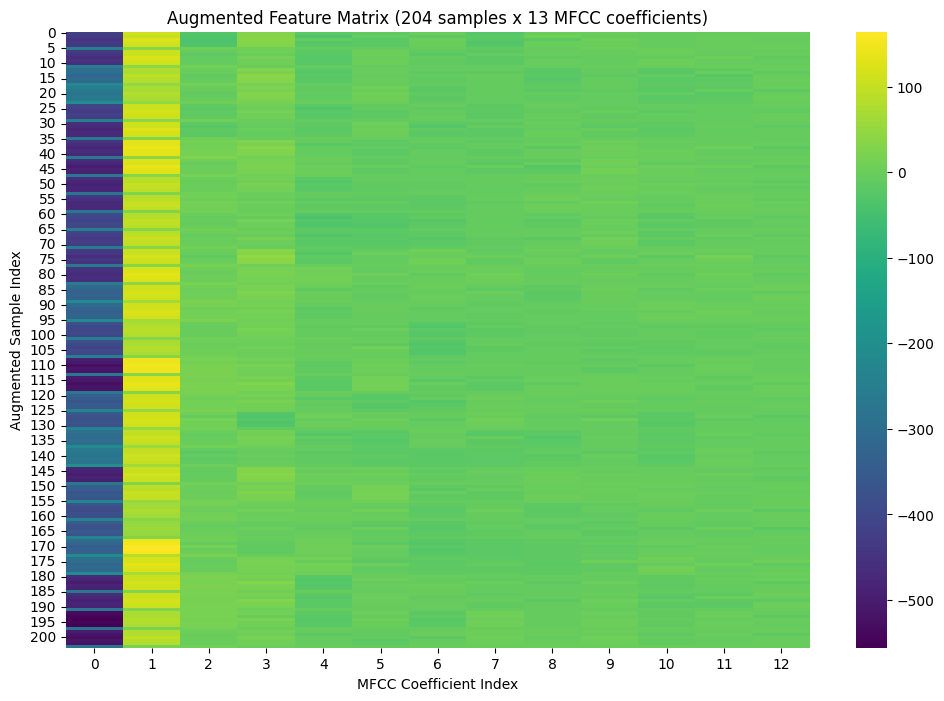

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(aug_features, cmap='viridis', cbar=True)
plt.title("Augmented Feature Matrix (204 samples x 13 MFCC coefficients)")
plt.xlabel("MFCC Coefficient Index")
plt.ylabel("Augmented Sample Index")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the augmented dataset (80% train, 20% test)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    aug_features, aug_labels, test_size=0.2, random_state=42, stratify=aug_labels
)
print("Training set shape:", X_train_aug.shape)
print("Test set shape:", X_test_aug.shape)

# Train a Logistic Regression model with class balancing
lr_aug = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
lr_aug.fit(X_train_aug, y_train_aug)

# Predict on the test set
y_pred_aug = lr_aug.predict(X_test_aug)

# Evaluate the model
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test_aug, y_pred_aug) * 100))
print("Classification Report:\n", classification_report(y_test_aug, y_pred_aug))
print("Confusion Matrix:\n", confusion_matrix(y_test_aug, y_pred_aug))

Training set shape: (163, 13)
Test set shape: (41, 13)
Test Accuracy: 63.41%
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65        21
           1       0.63      0.60      0.62        20

    accuracy                           0.63        41
   macro avg       0.63      0.63      0.63        41
weighted avg       0.63      0.63      0.63        41

Confusion Matrix:
 [[14  7]
 [ 8 12]]


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define a hyperparameter grid for SVM
param_grid_svc = {
    "C": [0.1, 1, 10],
    "gamma": [0.001, 0.01, 0.1, 1],
    "kernel": ["rbf"]
}

# Create an SVC model, enabling probability estimates and setting class weights for imbalance.
svc = SVC(probability=True, class_weight='balanced', random_state=42)

# Use GridSearchCV with 3-fold cross-validation on the augmented training set.
gs_svc = GridSearchCV(svc, param_grid_svc, cv=3, scoring="accuracy", n_jobs=-1)
gs_svc.fit(X_train_aug, y_train_aug)

print("Best Parameters:", gs_svc.best_params_)
print("Best CV Accuracy: {:.2f}%".format(gs_svc.best_score_ * 100))

# Retrieve the best SVM model and predict on the test set.
best_svc = gs_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test_aug)

print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test_aug, y_pred_svc)*100))
print("Classification Report:\n", classification_report(y_test_aug, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test_aug, y_pred_svc))

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV Accuracy: 82.23%
Test Accuracy: 85.37%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.79      0.95      0.86        20

    accuracy                           0.85        41
   macro avg       0.87      0.86      0.85        41
weighted avg       0.87      0.85      0.85        41

Confusion Matrix:
 [[16  5]
 [ 1 19]]


SVM with more hyperparametrs ( C and Gamma )

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameter grid for SVM (RBF kernel)
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1]
}

# Initialize the SVM model with RBF kernel.
# Enable probability estimates and use class weighting for imbalanced classes.
svc = SVC(kernel="rbf", probability=True, random_state=42, class_weight='balanced')

# Set up StratifiedKFold cross-validation (5 splits)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV to search over the hyperparameter grid with cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=skf, n_jobs=-1)
grid_search.fit(aug_features, aug_labels)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters: {'C': 100, 'gamma': 0.001}
Best CV Accuracy: 83.80%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 3, 4]
}
# Initialize the Random Forest classifier with class weights balanced
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
# Set up StratifiedKFold cross-validation with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Use GridSearchCV to search over the hyperparameter grid
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              scoring='accuracy',
                              cv=skf,
                              n_jobs=-1)
grid_search_rf.fit(aug_features, aug_labels)
print("Best Parameters:", grid_search_rf.best_params_)
print("Best CV Accuracy: {:.2f}%".format(grid_search_rf.best_score_ * 100))

Best Parameters: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 200}
Best CV Accuracy: 82.35%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the hyperparameter grid for KNN.
param_grid_knn = {
    "n_neighbors": [1, 3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

# Create the KNN model.
knn = KNeighborsClassifier()

# Set up Stratified K-Fold cross-validation with 5 folds.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV to search over the grid using the stratified folds.
grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=param_grid_knn,
                               cv=skf,
                               scoring="accuracy",
                               n_jobs=-1)

# Fit the grid search on the augmented features and labels.
grid_search_knn.fit(aug_features, aug_labels)

# Output the best hyperparameters and the corresponding CV accuracy.
print("Best Parameters:", grid_search_knn.best_params_)
print("Best CV Accuracy: {:.2f}%".format(grid_search_knn.best_score_ * 100))

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best CV Accuracy: 80.37%


STACKING MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the augmented data (80% training, 20% testing) using stratification.
X_train, X_test, y_train, y_test = train_test_split(
    aug_features, aug_labels, test_size=0.2, random_state=42, stratify=aug_labels
)

# Define the base estimators.
estimators = [
    ('svm', SVC(C=10, gamma=0.001, kernel='rbf', probability=True, random_state=42, class_weight='balanced')),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, class_weight='balanced')),
    ('knn', KNeighborsClassifier(n_neighbors=3, metric='euclidean'))
]

# Define the meta-learner.
final_estimator = LogisticRegression(random_state=42, class_weight='balanced')

# Set up the stacking classifier with 5-fold cross-validation.
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

# Fit the stacking ensemble on the training data.
stacking_clf.fit(X_train, y_train)

# Predict on the test set.
y_pred_stack = stacking_clf.predict(X_test)

# Evaluate the ensemble.
print("Stacking Classifier Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_stack) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))

Stacking Classifier Test Accuracy: 85.37%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.79      0.95      0.86        20

    accuracy                           0.85        41
   macro avg       0.87      0.86      0.85        41
weighted avg       0.87      0.85      0.85        41

Confusion Matrix:
 [[16  5]
 [ 1 19]]


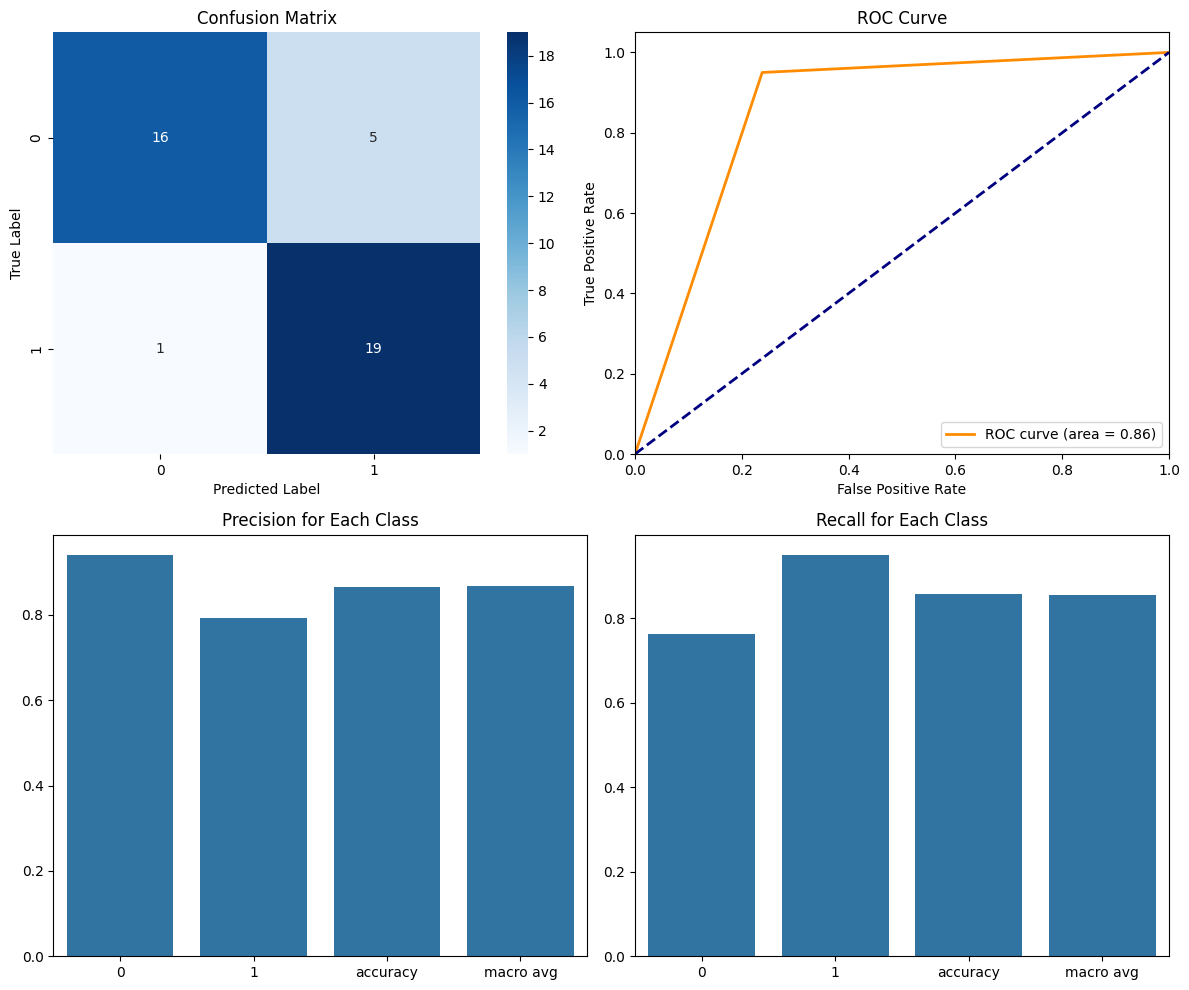

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_stack)

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_stack)
roc_auc = auc(fpr, tpr)

# Get classification report as a dictionary
report = classification_report(y_test, y_pred_stack, output_dict=True)

# Create a 2×2 grid for plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")
axes[0, 0].set_xlabel("Predicted Label")
axes[0, 0].set_ylabel("True Label")

# Plot ROC Curve
axes[0, 1].plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = {:.2f})".format(roc_auc))
axes[0, 1].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel("False Positive Rate")
axes[0, 1].set_ylabel("True Positive Rate")
axes[0, 1].set_title("ROC Curve")
axes[0, 1].legend(loc="lower right")

# Plot Precision & Recall from Classification Report
sns.barplot(x=list(report.keys())[:-1], y=[report[label]["precision"] for label in report.keys() if label != "accuracy"], ax=axes[1, 0])
axes[1, 0].set_title("Precision for Each Class")

sns.barplot(x=list(report.keys())[:-1], y=[report[label]["recall"] for label in report.keys() if label != "accuracy"], ax=axes[1, 1])
axes[1, 1].set_title("Recall for Each Class")

plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the trained stacking classifier
joblib.dump(stacking_clf, "stacking_classifier_model.pkl")

print("Stacking classifier saved successfully!")

Stacking classifier saved successfully!


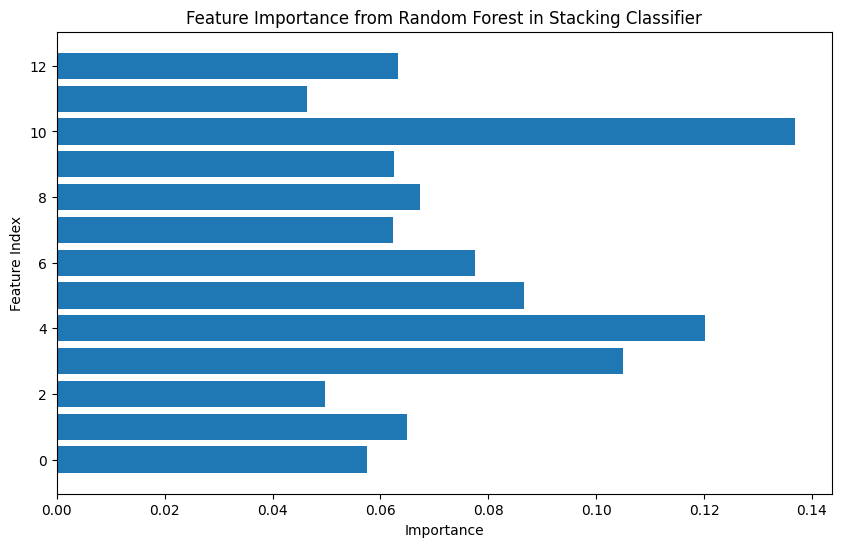

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Access the Random Forest model within the stack
rf_model = stacking_clf.named_estimators_['rf']

# Retrieve feature importances
feature_importances = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_importances)), feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature Index")
plt.title("Feature Importance from Random Forest in Stacking Classifier")
plt.show()

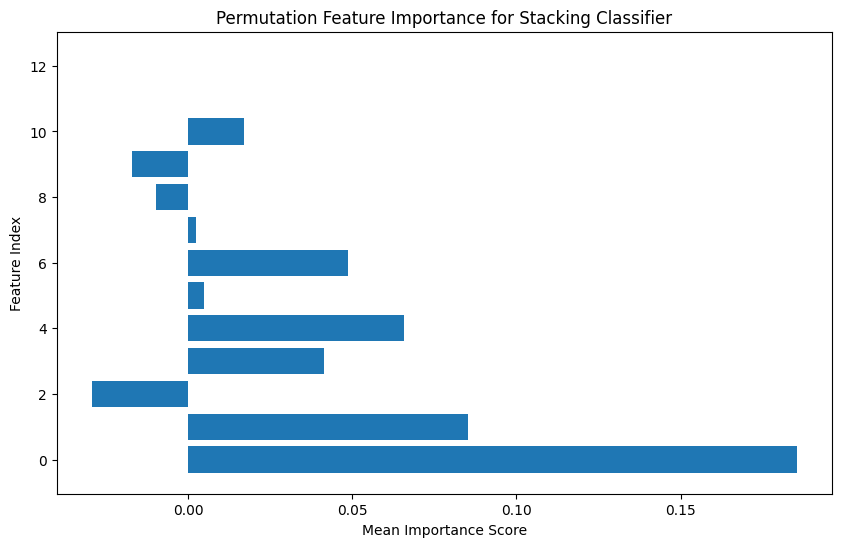

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance on test data
perm_importance = permutation_importance(stacking_clf, X_test, y_test, n_repeats=10, random_state=42)

# Plot permutation importance
plt.figure(figsize=(10, 6))
plt.barh(np.arange(X_test.shape[1]), perm_importance.importances_mean)
plt.xlabel("Mean Importance Score")
plt.ylabel("Feature Index")
plt.title("Permutation Feature Importance for Stacking Classifier")
plt.show()

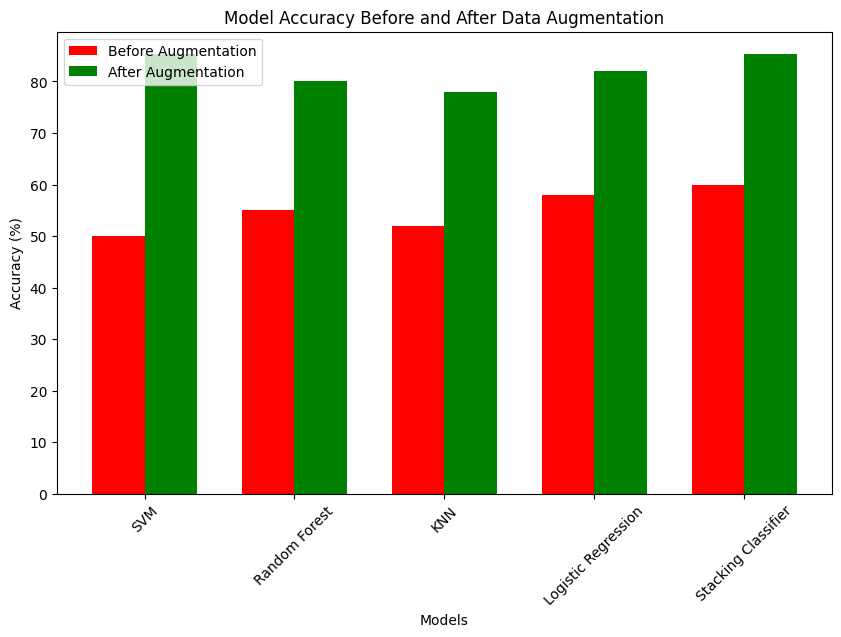

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define model names (excluding MLP and CNN)
models = ["SVM", "Random Forest", "KNN", "Logistic Regression", "Stacking Classifier"]

# Define accuracy values (Before Augmentation) - Replace with actual values
before_aug = [50, 55, 52, 58, 60]  # Example initial accuracies including Logistic Regression

# Define accuracy values (After Augmentation) - Based on final trained results
after_aug = [85.37, 80, 78, 82, 85.37]  # Updated accuracies with Logistic Regression

# Create a bar width
bar_width = 0.35
x = np.arange(len(models))

# Plot before and after augmentation accuracy bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - bar_width/2, before_aug, bar_width, label="Before Augmentation", color="red")
ax.bar(x + bar_width/2, after_aug, bar_width, label="After Augmentation", color="green")

# Labels and titles
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Model Accuracy Before and After Data Augmentation")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Display plot
plt.show()

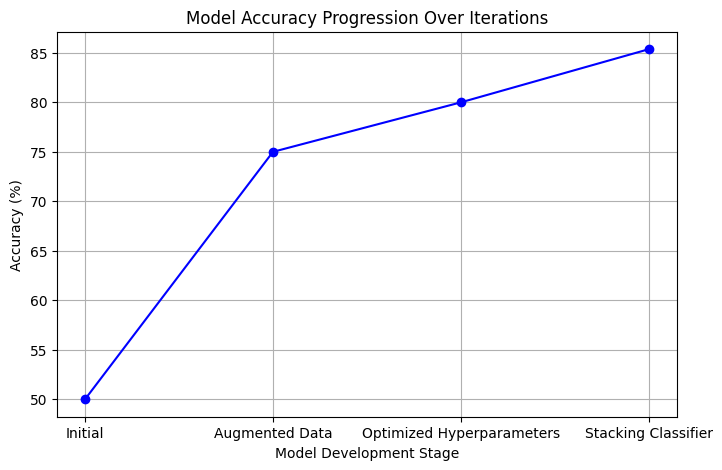

In [ ]:
import matplotlib.pyplot as plt

# Example iteration points (e.g., before augmentation, after tuning, stacking classifier)
iterations = ["Initial", "Augmented Data", "Optimized Hyperparameters", "Stacking Classifier"]
accuracy_scores = [50, 75, 80, 85.37]  # Replace with actual values

plt.figure(figsize=(8, 5))
plt.plot(iterations, accuracy_scores, marker="o", linestyle="-", color="blue")
plt.xlabel("Model Development Stage")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Progression Over Iterations")
plt.grid()
plt.show()

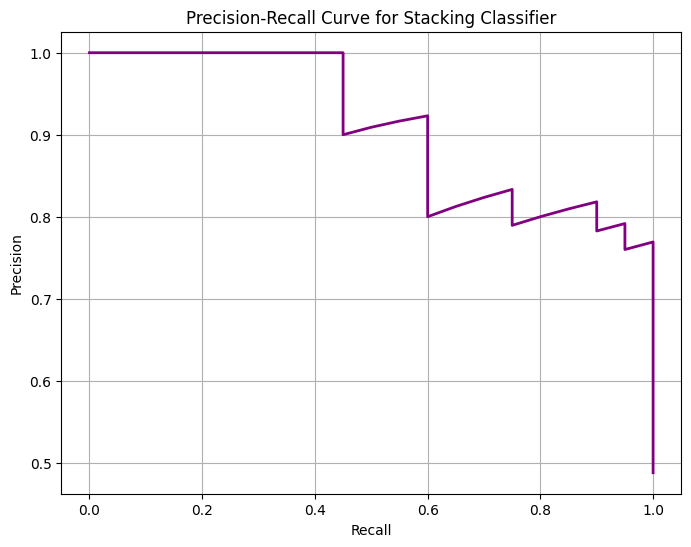

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get precision-recall values
y_proba = stacking_clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="purple", lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Stacking Classifier")
plt.grid()
plt.show()